2022-03-29 12:56:50.378930: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


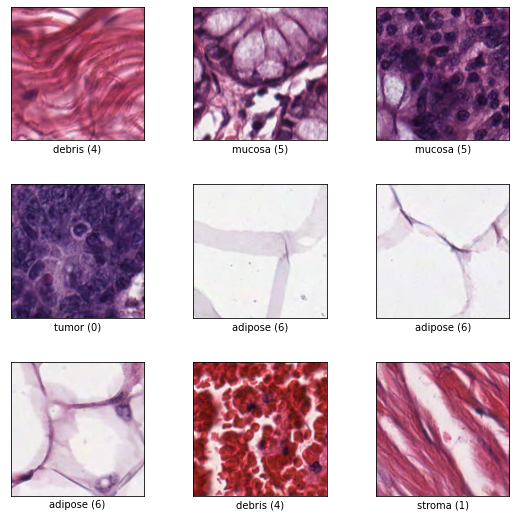

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

(ds_train, ds_test, ds_val), ds_info = tfds.load(
    "colorectal_histology",
    split=["train[:80%]", "train[80%:90%]", "train[90%:]"],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

fig = tfds.show_examples(ds_train, ds_info)

In [2]:
def normalizeIMG(image, label):
    return tf.cast(image/255, tf.float32), label

ds_train = ds_train.map(normalizeIMG, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(32)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_val = ds_val.map(normalizeIMG, num_parallel_calls=tf.data.AUTOTUNE)
ds_val = ds_val.batch(32)
ds_val = ds_val.cache()
ds_val = ds_val.prefetch(tf.data.AUTOTUNE)

ds_test = ds_val.map(normalizeIMG, num_parallel_calls=tf.data.AUTOTUNE)

## Deep Network

In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(150,150,3)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))

model.summary()

In [ ]:
model.compile(optimizer="sgd", 
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_val,
)

In [ ]:
score = model.evaluate(ds_test)

print(history.history.keys())

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## CNN

In [3]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.Input(shape=(150,150,3)))

#model.add(keras.layers.Conv2D(100, kernel_size=(3,3), strides=(1,1), activation="relu"))
#model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(keras.layers.Conv2D(50, kernel_size=(3,3), strides=(1,1), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)))

#model.add(keras.layers.Conv2D(20, kernel_size=(3,3), strides=(1,1), activation="relu"))
#model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(keras.layers.Conv2D(10, kernel_size=(2,2), strides=(1,1), activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1000, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(8, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 50)      1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 147, 147, 50)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 10)      2010      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 145, 145, 10)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 210250)            0         
                                                                 
 dense (Dense)               (None, 1000)              2

In [4]:
model.compile(optimizer="sgd", 
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
history = model.fit(
    ds_train,
    epochs=20,
    validation_data=ds_val,
)

Epoch 1/20
 10/125 [=>............................] - ETA: 2:41 - loss: 2.0441 - sparse_categorical_accuracy: 0.1344

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(ds_test)

print(history.history.keys())

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()